# Image Augmentation 
Image Augmentation is a very useful tricks that helps you to enhance the data. This technique is usually used in the very little dataset.
The documentation and code is still under construction...


## Image Augmentation methods
- Horizontal Flip
- Vertical Flip
- Noise
- Rotate
- Translate
- Zoom/Stretch
- Blur
- color variation
- Crop
- Scaling
- Shearing
- Channel shifts(RGB, HSV)
- Contrast
- Vignetting
- Color jitter(Random jitter contrast)
- Lens distortions

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure, img_as_float, color, data 
from skimage.transform import resize
from skimage.util import random_noise
from skimage.transform import AffineTransform
from skimage import transform
from skimage import exposure
from skimage import filters
from skimage import restoration
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.util import random_noise


%matplotlib inline
img=mpimg.imread('lenna.png')

In [2]:
# Image ploting
def showimg(subplace, title, img):
    plt.subplot(*subplace)
    plt.title(title)
    plt.axis('off')
    if len(img.shape) == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')

# Horizontal Flip
def fliph(img):
    return np.fliplr(img)

# Vertical Flip
def flipv(img):
    return np.flipud(img)

# Random Noise
def rand_noise(img, var=0.5):
    return random_noise(img, mode='gaussian', var=var) # 0.5 Noise

# Random Angle
def rand_rotate(img, angle=-50):
    return transform.rotate(img, angle)

# Random Translation
def rand_translation(img, translation=(-80, -150)):
    return transform.warp(img, AffineTransform(translation=translation))

# Random Motion Blur
def rand_motion_blur(img, size=10):
    kernel_motion_blur = np.zeros((size, size))
    kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
    kernel_motion_blur = kernel_motion_blur / size

    return cv2.filter2D(img, -1, kernel_motion_blur)

# Equalizing the histogram of an image
def equalize_img(img):
    return exposure.equalize_hist(img)

/usr/local/lib/python2.7/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


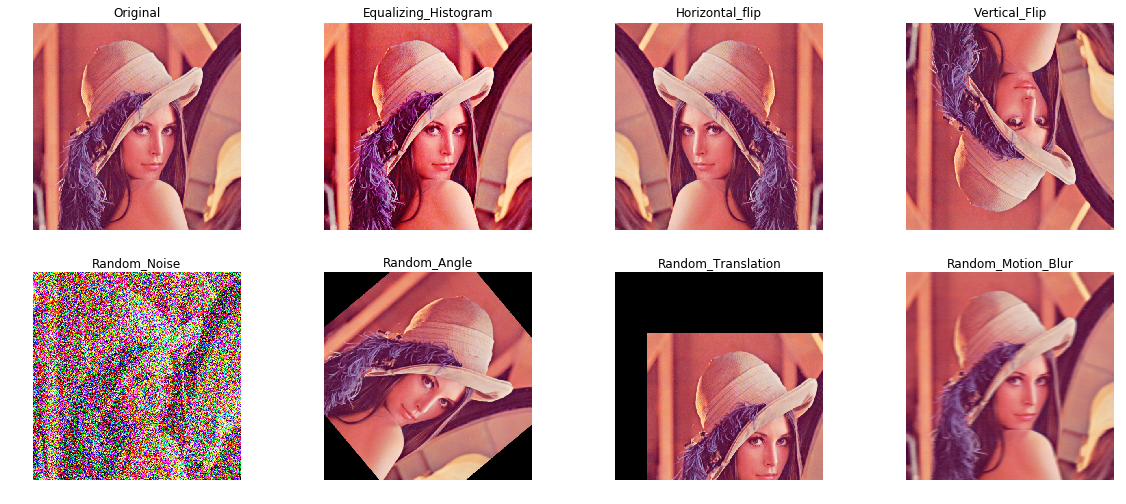

In [4]:
def image_augment(img):
    Original = img
    Equalizing_Histogram = equalize_img(img)
    Horizontal_flip = fliph(img)
    Vertical_Flip = flipv(img)
    Random_Noise = rand_noise(img)
    Random_Angle = rand_rotate(img)
    Random_Translation = rand_translation(img)
    Random_Motion_Blur = rand_motion_blur(img)
    plt.figure(figsize=[20, 13])    
    for i, img in enumerate(['Original', 'Equalizing_Histogram', 'Horizontal_flip', 'Vertical_Flip',
                             'Random_Noise', 'Random_Angle', 'Random_Translation', 'Random_Motion_Blur']):
        showimg((3, 4, i+1), img, eval(img))
        
        
image_augment(img)

# Image Filter
This image filter only works with Grayscale image

/usr/local/lib/python2.7/dist-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


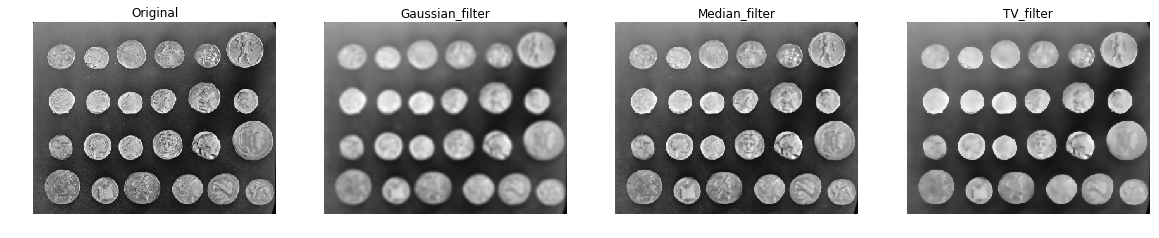

In [5]:
def gaussian_fil(img, sigma=2):
    return filters.gaussian_filter(img, sigma=sigma)

# Medium Filter
def median_fil(img, sigma=2):
    return filters.median(img, np.ones((3, 3)))

# TV filter
def tv_fil(img, sigma=2):
    return restoration.denoise_tv_chambolle(img, weight=0.1)

def image_filter(img):
    Original = img
    Gaussian_filter = gaussian_fil(img)
    Median_filter = median_fil(img)
    TV_filter = tv_fil(img)

    plt.figure(figsize=[20, 13])    
    for i, img in enumerate(['Original', 'Gaussian_filter', 'Median_filter', 'TV_filter']):
        showimg((3, 4, i+1), img, eval(img))
        

image_filter(data.coins())

Estimated Gaussian noise standard deviation = 0.148905226094


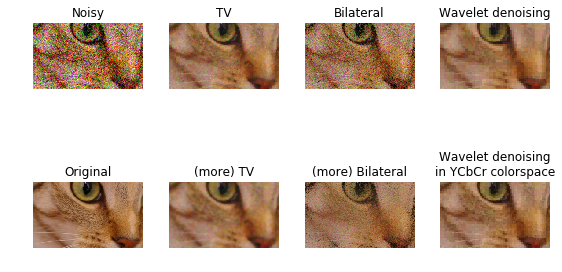

In [6]:
original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5), sharex=True,
                       sharey=True, subplot_kw={'adjustable': 'box-forced'})

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()
